# Assignment 1

In [93]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.constants import golden

In [12]:
def f(x):
    return x**2 + 2*x

In [10]:
start_left = -3
start_right = 5
n = 10

### Implementing Fibonacci Search

In [66]:
def fib_search(func, left, right, n_iterations, epsilon = 0.01):
    
    a = []
    b = []
    l = []
    m = []
    fl = []
    fm = []
    o_index = []
    
    s = (1-math.sqrt(5))/(1+math.sqrt(5))
    p = 1/(golden*(1-s**(n_iterations+1))/(1-s**n_iterations))
    
    d = p*right + (1-p)*left
    fd = func(d)
    
    for i in range(0, n_iterations-1):
        
        if(i==n_iterations-1):
            c = epsilon*left + (1-epsilon)*d
        else:
            c = p*left + (1-p)*right
            
        fc = func(c)    
            
        a.append(left)
        b.append(right)
        l.append(c)
        m.append(d)
        fl.append(fc)
        fm.append(fd)
        o_index.append(i+1)   
        
        if(fc<fd):
            right, d, fd = d, c, fc
        else:
            left, right = right, c
            
        p = 1/(golden*(1-s**(n_iterations-i+1))/(1-s**(n_iterations-i)))   
        
    comp_table_pd = pd.DataFrame(list(zip(a, b, l, m, fl, fm)), index = o_index, columns = ['a', 'b', 'l', 'm', 'f_l', 'f_m'])
    
    if(left< right):
        return (left, right, comp_table_pd)
    else:
        return (right, left, comp_table_pd)

In [80]:
n = 20
interval_left_fs, interval_right_fs, comp_tab_fs = fib_search(f, start_left, start_right, n)

In [81]:
optima_fs = (interval_left_fs + interval_right_fs)/2
print(optima_fs)

-0.9998870723231915


In [83]:
comp_tab_fs[:9]

,a,b,l,m,f_l,f_m
1,-3.000000,5.000000,0.055728,1.944272,0.114562,7.668737
2,-3.000000,1.944272,-1.111456,0.055728,-0.987578,0.114562
3,-3.000000,0.055728,-1.832816,-1.111456,-0.306418,-0.987578
4,0.055728,-1.832816,-0.665631,-1.111456,-0.888198,-0.987578
5,-1.832816,-0.665631,-1.386991,-1.111456,-0.850238,-0.987578
6,-0.665631,-1.386991,-0.941166,-1.111456,-0.996539,-0.987578
7,-0.665631,-1.111456,-0.835921,-0.941166,-0.973078,-0.996539
8,-1.111456,-0.835921,-1.006211,-0.941166,-0.999961,-0.996539
9,-1.111456,-0.941166,-1.046412,-1.006211,-0.997846,-0.999961


In [89]:
inter_len_fs = np.abs(comp_tab_fs['a']-comp_tab_fs['b'])
inter_len_fs

1     8.000000
2     4.944272
3     3.055728
4     1.888544
5     1.167184
6     0.721360
7     0.445825
8     0.275535
9     0.170290
10    0.105245
11    0.065044
12    0.040201
13    0.024843
14    0.015358
15    0.009486
16    0.005872
17    0.003614
18    0.002258
19    0.001355
dtype: float64

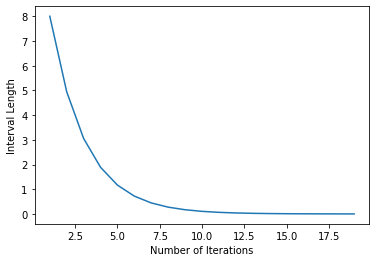

In [91]:
plt.plot(inter_len_fs)
plt.xlabel("Number of Iterations")
plt.ylabel("Interval Length")
plt.show()

### Implementing Golden Search

In [44]:
def golden_search(func, left, right, n_iterations): 
    
    a = []
    b = []
    l = []
    m = []
    fl = []
    fm = []
    o_index = []
    
    p = golden-1
    d = p * right + (1 - p)*left
    fd = func(d)
    
    for i in range(0, n_iterations-1):
        
        c = p*left + (1-p)*right
        fc = func(c)
        
        a.append(left)
        b.append(right)
        l.append(c)
        m.append(d)
        fl.append(fc)
        fm.append(fd)
        o_index.append(i+1)
        
        if(fc<fd):
            right, d, fd = d, c, fc
        else:
            left, right = right, c
    
    comp_table_pd = pd.DataFrame(list(zip(a, b, l, m, fl, fm)), index = o_index, columns = ['a', 'b', 'l', 'm', 'f_l', 'f_m'])
    
    if(left< right):
        return (left, right, comp_table_pd)
    else:
        return (right, left, comp_table_pd)

In [86]:
n = 20
interval_left_gs, interval_right_gs, comp_tab_gs = golden_search(f, start_left, start_right, n)

In [46]:
optima_gs = (interval_left_gs + interval_right_gs)/2
print(optima_gs)

-1.0138887549322826


In [87]:
comp_tab_gs[:9]

,a,b,l,m,f_l,f_m
1,-3.000000,5.000000,0.055728,1.944272,0.114562,7.668737
2,-3.000000,1.944272,-1.111456,0.055728,-0.987578,0.114562
3,-3.000000,0.055728,-1.832816,-1.111456,-0.306418,-0.987578
4,0.055728,-1.832816,-0.665631,-1.111456,-0.888198,-0.987578
5,-1.832816,-0.665631,-1.386991,-1.111456,-0.850238,-0.987578
6,-0.665631,-1.386991,-0.941166,-1.111456,-0.996539,-0.987578
7,-0.665631,-1.111456,-0.835921,-0.941166,-0.973078,-0.996539
8,-1.111456,-0.835921,-1.006211,-0.941166,-0.999961,-0.996539
9,-1.111456,-0.941166,-1.046411,-1.006211,-0.997846,-0.999961


In [88]:
inter_len_gs = np.abs(comp_tab_fs['a']-comp_tab_fs['b'])
inter_len_gs

1     8.000000
2     4.944272
3     3.055728
4     1.888544
5     1.167184
6     0.721360
7     0.445825
8     0.275535
9     0.170290
10    0.105245
11    0.065044
12    0.040201
13    0.024843
14    0.015358
15    0.009486
16    0.005872
17    0.003614
18    0.002258
19    0.001355
dtype: float64

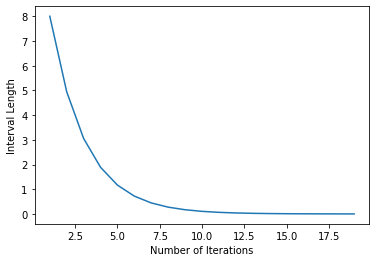

In [92]:
plt.plot(inter_len_gs)
plt.xlabel("Number of Iterations")
plt.ylabel("Interval Length")
plt.show()

### Verification of Golden Section Method

In [94]:
from scipy.optimize import minimize_scalar

In [95]:
opt_gs_ms = minimize_scalar(fun = f, bracket = (start_left, start_right), method = "golden")
opt_gs_ms.x

-0.9999999987444217

# Assignment 2

In [144]:
from scipy.optimize import line_search

In [145]:
def f1(x):
    return x[0]**2 + x[0]*x[1] + x[1]**2

def g1(x):
    a = 2*x[0] + x[1]
    b = 2*x[1] + x[0]
    return np.array([a,b])

In [146]:
x_initial = np.array([1,2])
dir_initial = np.array([-1,-1])
cond_1 = 0.0001
cond_2 = 0.9
max_step = 10
max_iter = 10
reduc_fact = 0.5

In [147]:
opt_ls = line_search(f = f1, myfprime = g1, xk = x_initial, pk = dir_initial, c1 = cond_1, c2 = cond_2, amax = max_step,
                     maxiter = max_iter)

In [148]:
alpha = opt_ls[0]
opt = x_initial + alpha*dir_initial

In [149]:
print("The x co-ordinate of the optima is: ", opt[0])
print("The y co-ordinate of the optima is: ", opt[1])

The x co-ordinate of the optima is:  0.0
The y co-ordinate of the optima is:  1.0


In [150]:
opt_ls

(1.0, 2, 1, 1.0, 7.0, array([1., 2.]))